<a href="https://colab.research.google.com/github/KhachDavid/ME314/blob/main/hw0_SP22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ME314 Homework 0

###Submission instructions

Deliverables that should be included with your submission are shown in **bold** at the end of each problem statement and the corresponding supplemental material. Your homework will be graded IFF you submit a **single** PDF and a link to a Google colab file that meet all the requirements outlined below.

- List the names of students you've collaborated with on this homework assignment.
- Include all of your code (and handwritten solutions when applicable) used to complete the problems.
- Highlight your answers (i.e. **bold** and outline the answers) and include simplified code outputs (e.g. .simplify()).
- Enable Google Colab permission for viewing
 * Click Share in the upper right corner
 * Under "Get Link" click "Share with..." or "Change"
 * Then make sure it says "Anyone with Link" and "Editor" under the dropdown menu
- Make sure all cells are run before submitting (i.e. check the permission by running your code in a private mode)
 * Please don't make changes to your file after submitting, so we can grade it!
- Submit a link to your Google Colab file that has been run (before the submission deadline) and don't edit it afterwards!

**NOTE:** This Juputer Notebook file serves as a template for you to start homework. Make sure you first copy this template to your own Google driver (click "File" -> "Save a copy in Drive"), and then start to edit it.

In [1]:
#IMPORT ALL NECESSARY PACKAGES AT THE TOP OF THE CODE
import sympy as sym
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# ##############################################################################################
# # If you're using Google Colab, uncomment this section by selecting the whole section and press
# # ctrl+'/' (Linux/Windows) or cmd+'/' (MacOS) on your and keyboard. Run it before you start
# # programming, this will enable the nice LaTeX "display()" function for you. If you're using
# # the local Jupyter environment, leave it alone
# ##############################################################################################


# def custom_latex_printer(exp,**options):
    # from google.colab.output._publish import javascript
    # url = "https://cdnjs.cloudflare.com/ajax/libs/mathjax/3.1.1/latest.js?config=TeX-AMS_HTML"
    # javascript(url=url)
    # return sym.printing.latex(exp,**options)
# sym.init_printing(use_latex="mathjax",latex_printer=custom_latex_printer)

## Problem 1 (20pts)

Given a function $f(x)=\sin(x)$, find the derivative of $f(x)$ and find the directional derivative of $f(x)$ in the direction $v$.  Moreover, compute these derivatives using Pythons's SymPy package.

*Hint 1: As an example, below is the code solving the problem when $f(x) = x^2$ (feel free to take it as a start point for your solution).*

In [3]:
####################################
# Part 1: compute derivative of f

# define your symbolic variable here
x = sym.symbols('x')

# define the function f
f = sym.sin(x) # if you're using Jupyter-Notebook, try "display(f)"

# compute derivative of f
# (uncomment next line and add your code)
df = f.diff(x)

# output resutls
print("derivative of f: ")
display(df)

####################################
# Part 2: compute directional derivative of f

# define dummy variable epsilon, and the direction v
# note 1: here the character 'r' means raw string
# note 2: here I define the symbol for epsilon with
#          the name "\epsilon", this is for LaTeX printing
#          later. In your case, you can give it any other
#          name you want.
eps, v = sym.symbols(r'\epsilon, v')

# add eplision into function f
new_f = sym.sin(x + v*eps)

# take derivative of the new function w.r.t. epsilon
df_eps = new_f.diff(eps)

# output this derivative
print("derivative of f wrt eps: ")
display(df_eps)

# now, as you've seen the class, we need evaluate for eps=0 to ...
# ... get the directional derivative. To do this, we need to ...
# ... use SymPy's built-in substitution method "subs()" to ...
# ... replace the epsilon symbol with 0
new_df = df_eps.subs(eps, 0)

# output directional derivative
print("directional derivative of f on v: ")
display(new_df)

derivative of f: 


cos(x)

derivative of f wrt eps: 


v*cos(\epsilon*v + x)

directional derivative of f on v: 


v*cos(x)

**Turn in: A scanned (or photograph from your phone or webcam) copy of your hand written solution for both derivatives (or you can use $\LaTeX$, instead of hand writing). Also, turn in the code used to compute the symbolic solutions for both derivatives and the code output.**

Given a function $f:$


$$
f(x) = sin(x)
$$

The derivative of $f:$

$$
\frac{df(x)}{dx} = cos(x)
$$


Let's take the derivative of $f$ in the direction $v:$

$$
Df(x)v = \frac{d}{d\epsilon} f(x + \epsilon v) \bigg|_{\epsilon=0}
$$

Plugging $f(x) = sin(x)$

$$
Dsin(x)v = \frac{d}{d\epsilon}sin(x + \epsilon v) \bigg|_{\epsilon=0}
$$

Differentiation with respect to $\epsilon$ using the chain rule gives us

$$
Dsin(x)v = vcos(x + \epsilon v) \bigg|_{\epsilon=0}
$$

Plugging in 0 for $\epsilon$:

$$
Dsin(x)v = vcos(x)
$$


## Problem 2 (20pts)

Given a function of trajectory:
$$
J(x(t)) = \int_0^{\pi/2} \frac{1}{2} x(t)^2 dt
$$
Compute the analytical solution when $x=\cos(t)$, verify your answer by numerical integration.

The code for numerical integration is provided below:

In [8]:
def integrate(func, xspan, step_size):
    '''
    Numerical integration with Euler's method

    Parameters:
    ====================
    func: Python function
        func is the function you want to integrate for
    xspan: list
        xspan is a list of two elements, representing
        the start and end of integration
    step_size:
        a smaller step_size will give a more accurate result

    Returns:
    int_val:
        result of the integration
    ====================
    '''
    x = np.arange(xspan[0], xspan[1], step_size)
    int_val = 0
    for xi in x:
        int_val += func(xi) * step_size
    return int_val


def cos(x):
    return (sym.cos(x)**2) / 2

print( integrate(func=cos, xspan=[0, sym.pi / 2], step_size=0.001) )
# or you just call the function without indicating parameters
# print( integrate(square, [0, 1], 0.01) )

0.392949081706737


**Turn in: A scanned (or photograph from your phone or webcam) copy of your hand written analytical solution (or you can use $\LaTeX$). Also, turn in the code you used to numerically evaluate the result and the code output.**

Solution:

$$
J(x(t)) = \int_0^{\pi/2}\frac{1}{2}cos(t)^2dt = \int_0^{\pi/2}\frac{cos(2t) + 1}{4}dt = \bigg|_0^{\pi / 2} \frac{sin(2t)}{8} + \frac{t}{4} = \frac{\pi}{8}
$$

## Problem 3 (20pts)

For the function $J(x(t))$ in Problem 2, compute and evaluate the analytical solution for the directional derivative of $J$ at $x(t) = \cos(t)$ in the direction $v(t) = \sin(t)$. Note that the directional derivative should be in the form of integration. Evaluate this integral analytically, and verify your answer using the same numerical integration function as in Problem 2.

**Turn in: A scanned (or photograph from your phone or webcam) copy of your hand written (or you can use $\LaTeX$) derivation and evaluation of the directional derivative. Also, include the code used to numerically verify the integration result.**

In [25]:
# Put this in your import cell.
from IPython.display import Markdown, display

# How to print in bold, you could wrap the "display(Markdown())""
# in a function if you want a more consice alternative.
#answer = 0.5
#display(Markdown("**He: {}**".format(answer)))
def f3(x):
    return sym.cos(x) * sym.sin(x) 

answer = integrate(func=f3, xspan=[0, sym.pi / 2], step_size=0.001)

display(Markdown(f"The answer: **{answer}**"))


The answer: **0.499999914428558**

Compute the directional derivative using:

$$
Df(x)v = \frac{d}{d\epsilon} f(x + \epsilon v) \bigg|_{\epsilon=0}
$$

$$
x(t) = cos(t)
$$

$$
v(t) = sin(t)
$$

The directional derivative for $J(x(t))$ would take the form below:

$$
\int_0^{\pi/2} \frac{d}{d\epsilon}\frac{1}{2}(x(t) + \epsilon v(t))^2dt \bigg|_{\epsilon=0}
$$

We differentiate with respect to $\epsilon$. Using the $Chain$ $Rule$ we get:

$$
\int_0^{\pi/2} x(t)v(t)dt
$$

We have values defined for $x(t)$ and $v(t)$. Plugging in these values we get
$$
\int_0^{\pi/2} sin(t)cos(t)dt
$$

Using the trig identity

$$
\frac{1}{2}\int_0^{\pi/2} sin(2t)dt
$$

$$
\bigg|_0^{\pi / 2} -\frac{1}{4}cos(2t)
$$

$$
-\frac{1}{4}cos{\pi} + \frac{1}{4}(cos(0))
$$

$$
\frac{1}{4}(cos(0) - cos(\pi)) = \frac{1}{2}
$$

## Problem 4 (20pts)

Verify your answer in Problem 3 symbolically using Python's SymPy package, this means you need to compute the directional derivative and evaluate the integration all symbolically.

*Hint 1: Different from computing directional derivative in Problem 1, this time the function includes integration. Thus, instead of defining x as a symbol, you should define x as a function of symbol t. An example of defining function and taking the derivative of the function integration is provided below.*

In [41]:
t = sym.symbols('t')
# define function x and y
x = sym.Function('x')(t)
v = sym.Function('v')(t)
epsilon = sym.symbols(r'\epsilon')
# define J(x(t), y(t))
J = sym.integrate(0.5 * (x + (epsilon * v))**2, [t, 0, sym.pi / 2])
display(Markdown(r'$J(x(t) + {\epsilon} v(t))$ evaluates: '))
display(J)

# take the time derivative of J(x(t))
dJdx = J.diff(epsilon)
display(Markdown(r'Derivative of $J(x(t) + {\epsilon} v(t))$ with respect to $\epsilon$ equals: '))
display(dJdx)

# now, we have x(t)=sin(t) and v(t)=cos(t), we substitute them
# in, and evaluate the integration
dJdx_subs = dJdx.subs({x:sym.cos(t), v:sym.sin(t)})
print('derivative of J, after substitution: ')
display(Markdown(r'Derivative of $J$, after substituting $v(t) = sin(t)$ and $x(t) = cos(t)$'))
display(dJdx_subs)
dJdx_epsilon_zero = dJdx_subs.subs({epsilon: 0})
display(Markdown(r'Evaluation of derivative of $J$, after setting $\epsilon$ to $0$: '))
display(sym.N(dJdx_epsilon_zero))


$J(x(t) + {\epsilon} v(t))$ evaluates: 

0.5*Integral(\epsilon**2*v(t)**2, (t, 0, pi/2)) + 0.5*Integral(2*\epsilon*v(t)*x(t), (t, 0, pi/2)) + 0.5*Integral(x(t)**2, (t, 0, pi/2))

Derivative of $J(x(t) + {\epsilon} v(t))$ with respect to $\epsilon$ equals: 

0.5*Integral(2*\epsilon*v(t)**2, (t, 0, pi/2)) + 0.5*Integral(2*v(t)*x(t), (t, 0, pi/2))

derivative of J, after substitution: 


Derivative of $J$, after substituting $v(t) = sin(t)$ and $x(t) = cos(t)$

0.5*Integral(2*\epsilon*sin(t)**2, (t, 0, pi/2)) + 0.5*Integral(2*sin(t)*cos(t), (t, 0, pi/2))

Evaluation of derivative of $J$, after setting $\epsilon$ to $0$: 

0.500000000000000

## Problem 5 (20pts)

Given the equation:
$$
xy + \sin(x) = x + y
$$
Use Python's SymPy package to symbolically solve this equation for $y$, thus you can write $y$ as a function of $x$. Transfer your symbolic solution into a numerical function and plot this function for $x\in[0, \pi]$ with Python's Matplotlib package.

In this problem you will use two methods in SymPy. The first is its symbolic sovler method **solve()**, which takes in an equation or expression (in this it equals 0) and solve it for one or one set of variables. Another method you will use is **lambdify()**, which can transfer a symbolic expression into a numerical function automatically (of course in this problem we can hand code the function, but later in the class we will have super sophisticated expression to evaluate.

Below is an example of using these two methods for an equation $2x^3\sin(4x) = xy$ (feel free to take this as the start point for your solution):

Original equation


Eq(x*y + sin(x), x + y)

Symbolic solutions
[(x - sin(x))/(x - 1)]
Test: func(1.0000001) =  1585290.6106931723


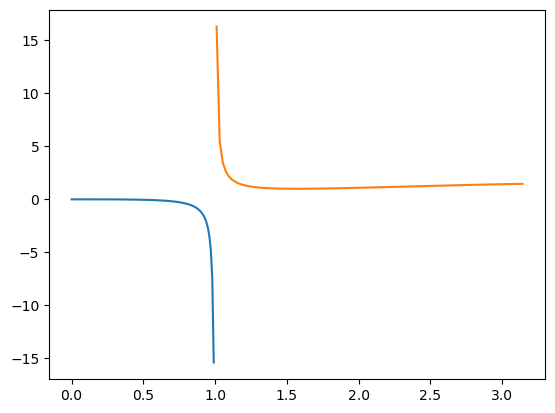

In [57]:
# from sympy.abc import x, y # it's same as defining x, y using symbols() OR
x, y = sym.symbols(r'x,y')

# define an equation
eqn = sym.Eq(x*y + sym.sin(x), x + y)
print('Original equation')
display(eqn)

# solve this equation for y
y_sol = sym.solve(eqn, y) # this method returns a list,
                             # which may include multiple solutions
print('Symbolic solutions')
print(y_sol)
y_expr = y_sol[0] # in this case we just have one solution

# lambdify the expression wrt symbol x
func = sym.lambdify(x, y_expr)
print('Test: func(1.0000001) = ', func(1.0000001))

##############
# now it's time to plot it from 0 to pi

# generate list of values from 0 to pi
# the solution has two paraboles and there is no real solutin for x = 1. So we split the plot into two sections
x_list = np.linspace(0, 0.99, 100)
f_list = func(x_list)
x_list_2 = np.linspace(1.01, np.pi, 100)
f_list_2 = func(x_list_2)

# plot it
plt.plot(x_list, f_list)
plt.plot(x_list_2, f_list_2)
plt.show()

**Turn in: A copy of the code used to solve for symbolic solution and evaluate it as a numerical function. Also, include the plot of the numerical function.**

In [ ]:
# You can start your implementation here :)